# PCR Flanks - blow5/pod5

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pod5 as p5
from read5 import read
from scipy import signal

In [2]:
SAMPLE_RATE = 5000

In [3]:
def plot_signal(signal, sample_rate=SAMPLE_RATE):
    # Compute the time steps over the sampling period
    time = np.arange(len(signal)) / sample_rate

    # Plot using matplotlib
    plt.plot(time, signal)

## Load blow5 targets

In [4]:
slow_path = '../../../projects/ONT/data/dmpk/dmpk_fwd_050_0005_reads.blow5'
r5 = read(slow_path)

In [5]:
for r in r5:
    print(r)

S1_1!chrFP!0!50!+
S1_2!chrFI!0!15!+
S1_3!chrFS!0!50!+


In [6]:
r5.getSamplingRate('S1_1!chrFP!0!50!+')

5000.0

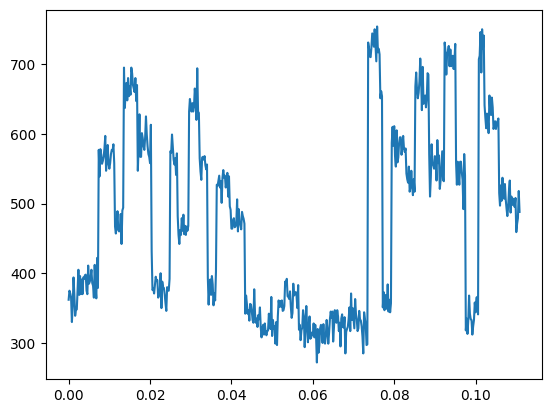

In [7]:
read_id = 'S1_1!chrFP!0!50!+'

# Get the signal data and sample rate
sample_rate = r5.getSamplingRate(read_id)
signal_target = r5.getSignal(read_id)

plot_signal(signal_target)

## Load and process reads

In [8]:
read_ids = []
reads = []
input_path = '../../../projects/ONT/data/pcr2persons/pod5/'
for i in range(66):
    f = f'{input_path}AQD087_pass_fae3d762_8343086c_{i}.pod5'
    with p5.Reader(f) as reader:
        for read_record in reader.reads():
            if '90c36059-b1b8-435f-912d-533eaf89cedd' in str(read_record.read_id):
                print('Found it!')
            else:
                continue
            
            read_ids.append(read_record.read_id)
            signal_read = read_record.signal
            reads.append([read_record.read_id, signal_read, read_record.run_info])
            break

Found it!


In [9]:
print(len(read_ids), read_ids[0])

1 90c36059-b1b8-435f-912d-533eaf89cedd


In [10]:
reads[0][2]

RunInfo(acquisition_id='8343086cdfdce89c150a7f7a52ca7e371b1c98cd', acquisition_start_time=datetime.datetime(2023, 8, 20, 18, 2, 19, 877000, tzinfo=<UTC>), adc_max=4095, adc_min=-4096, context_tags={'barcoding_enabled': '0', 'basecall_config_filename': 'dna_r10.4.1_e8.2_400bps_5khz_hac_mk1c.cfg', 'experiment_type': 'genomic_dna', 'local_basecalling': '1', 'package': 'bream4', 'package_version': '7.5.9', 'sample_frequency': '5000', 'selected_speed_bases_per_second': '400', 'sequencing_kit': 'sqk-lsk114'}, experiment_name='20230820_MD811_MD1655_20fmol', flow_cell_id='AQD087', flow_cell_product_code='FLO-FLG114', protocol_name='sequencing/sequencing_MIN114_DNA_e8_2_400K:FLO-FLG114:SQK-LSK114:400', protocol_run_id='fae3d762-e453-4ae8-b41c-60078ffa3c8c', protocol_start_time=datetime.datetime(2023, 8, 20, 18, 1, 45, 49000, tzinfo=<UTC>), sample_id='MD811_MD1655', sample_rate=5000, sequencing_kit='sqk-lsk114', sequencer_position='MC-113559', sequencer_position_type='MinION Mk1C', software='Min

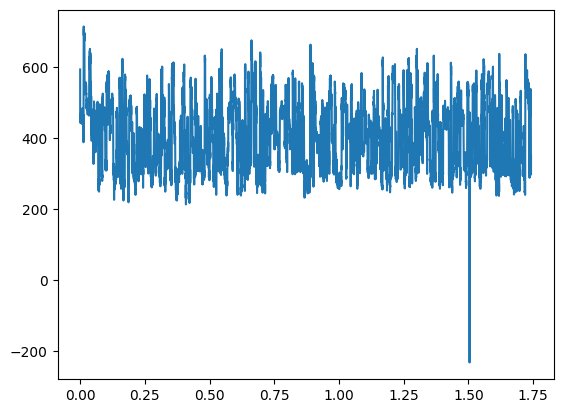

In [11]:
plot_signal(reads[0][1])

[-277 -276 -275 ... 8433 8434 8435]
8713 555 8713


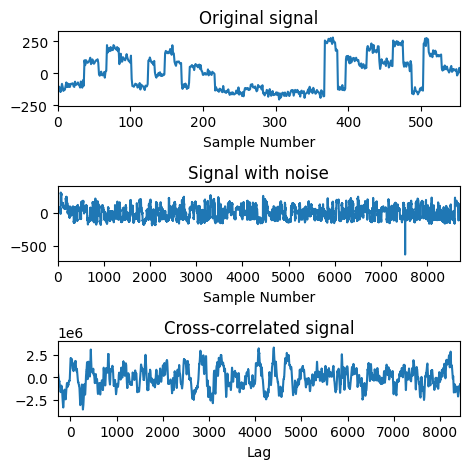

In [12]:
signal_read = reads[0][1]

signal_target = signal_target - np.mean(signal_target)
signal_read = signal_read - np.mean(signal_read)

corr = signal.correlate(signal_read, signal_target, mode='same', method='fft')
lags = signal.correlation_lags(len(signal_read), len(signal_target), mode='same', )
print(lags)
# corr /= np.max(corr)
print(len(signal_read), len(signal_target), len(corr))
# np.argmin(corr), np.min(corr)
# corr[0]

fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, figsize=(4.8, 4.8))
ax_orig.plot(signal_target)
ax_orig.set_title('Original signal')
ax_orig.set_xlabel('Sample Number')
ax_noise.plot(signal_read)
ax_noise.set_title('Signal with noise')
ax_noise.set_xlabel('Sample Number')
ax_corr.plot(lags, corr)
ax_corr.set_title('Cross-correlated signal')
ax_corr.set_xlabel('Lag')
ax_orig.margins(0, 0.1)
ax_noise.margins(0, 0.1)
ax_corr.margins(0, 0.1)
fig.tight_layout()
plt.show()

In [13]:
np.argmax(corr), np.max(corr)

(4680, 3330792.6126126125)

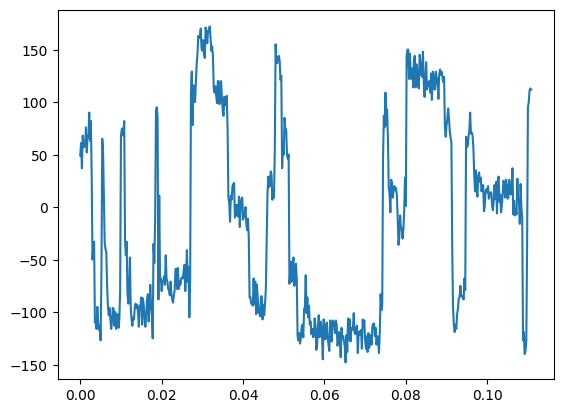

In [14]:
plot_signal(signal_read[4680:4680+555])

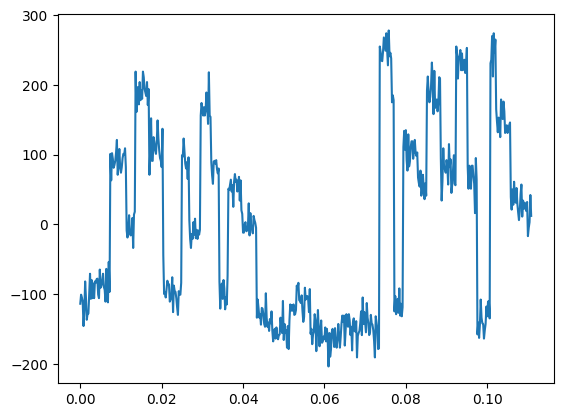

In [15]:
plot_signal(signal_target)

## Done!

In [16]:
r5.close()